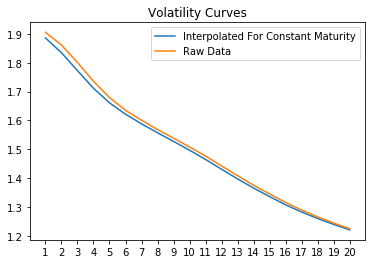

In [8]:
import pandas as pd
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None 
#reading the data
imm_dates = pd.read_csv('/Users/Hatim/Downloads/imm_Quandl_Rolling_EDs-2.csv', index_col=0)
ed_data = pd.read_csv('/Users/Hatim/Downloads/closes_Quandl_Rolling_EDs.csv', index_col= 0)

#coverting the index to datetime format
ed_data.index = pd.to_datetime(ed_data.index)

#slicing the data from 2005 to present
ed_data_new = ed_data.ix['01-03-2005':]

"""The data has some discrepancy. Some of the values for rates are above 90. 
So dropping those values"""
ed_data_new[ed_data_new > 50] = np.nan
           
#interpolating the missing data
ed_data_new.interpolate(method = 'linear', axis =  1, inplace = True)

#coverting the index to datetime format
imm_dates.index = pd.to_datetime(imm_dates.index)

#converting all dates to datetime
imm_dates = imm_dates.apply(pd.to_datetime)

#slicing the data from 2005 to present
imm_dates = imm_dates.ix['01-03-2005':,:20]
sub = list(imm_dates.index)
#subtracting the index to get the days to maturity
dtm = imm_dates.sub(sub, axis = 0)
dtm = dtm.astype('timedelta64[D]').astype(int)
inter = pd.DataFrame()
const = []
[const.append(90*i) for i in range(1,21)]
const = np.array(const)
inter = np.zeros((len(dtm),len(dtm.columns)))

#interpolating the constant maturity rates
for i in range(len(dtm)):
    tck = interpolate.interp1d(np.array(dtm.ix[i,:]),np.array(ed_data_new.ix[i,:]),kind='linear',fill_value='extrapolate')
    inter[i,:] = tck(const)
inter = pd.DataFrame(inter)
std_interpolated = []
std = []
#volatility for interpolated data
[std_interpolated.append(inter.ix[:,i].std()) for i in range(len(inter.columns))]
#volatility for raw data
[std.append(ed_data_new.ix[:,i].std()) for i in range(len(ed_data_new.columns))]

lst = []
[lst.append(i) for i in range(1,21)]
plt.xticks(lst)
plt.plot(lst,std_interpolated, label='Interpolated For Constant Maturity')
plt.plot(lst,std, label='Raw Data')
plt.title('Volatility Curves')
plt.legend(loc='upper right')
plt.show()
